In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# imports
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import pathlib
import os
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time


In [55]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm

from shapely.geometry import box

In [56]:
# opening STAC catalog, either a url, cloud storage link or a local (cloned) folder
cwd = pathlib.Path().resolve()

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    #os.path.join(os.path.dirname(cwd), "stac_folder", "current", "catalog.json") # local clone 
)
catalog

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\pystac_client\client.py:186: NoConformsTo:

Server does not advertise any conformance classes.



<Client id=gca-catalog>

In [57]:
list(catalog.get_children())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>]

In [58]:
collection= catalog.get_child("Exp-NS_Slopes")
collection

<CollectionClient id=Exp-NS_Slopes>

In [59]:
href = catalog.get_child("Exp-NS_Slopes").assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:     (nstations: 783438)
Coordinates:
    error_code  (nstations) int64 dask.array<chunksize=(48965,), meta=np.ndarray>
    lat         (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
    lon         (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
Dimensions without coordinates: nstations
Data variables:
    dc          (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
    slope       (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Panagiotis Athanasiou, Ap van Dongeren, Alessio Giar...
    CITATION:            Athanasiou, P., van Dongeren, A., Giardino, A., Vous...
    COMMENT:             Error or Warning code from the calculation: 0: No er...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Global nearshore slope estimations using an interpol...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['nearshore slope', 'global distribution', 'MERIT+GE...
    TEMPORAL_EXTENT:     ['2019-04-30T00:00:00Z', 'Present']
    TITLE:               Global Distribution of Nearshore Slopes
    TITLE_ABBREVIATION:  gsns
    UNITS:               Decimal degrees for Latitude and Longitude, Positive...

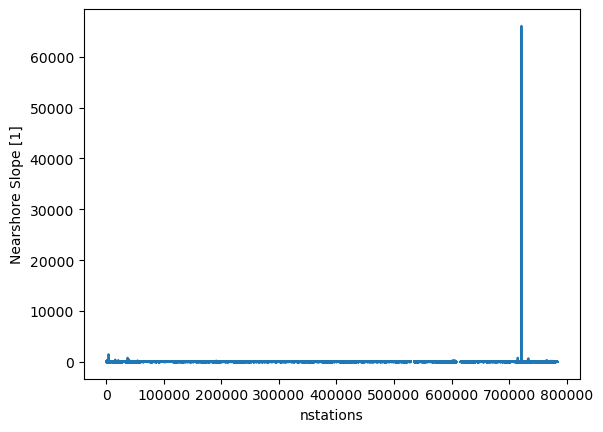

In [60]:


# Create a map projection
ax = plt.axes()

# Plot the variable
ds["slope"].plot(ax=ax)


# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

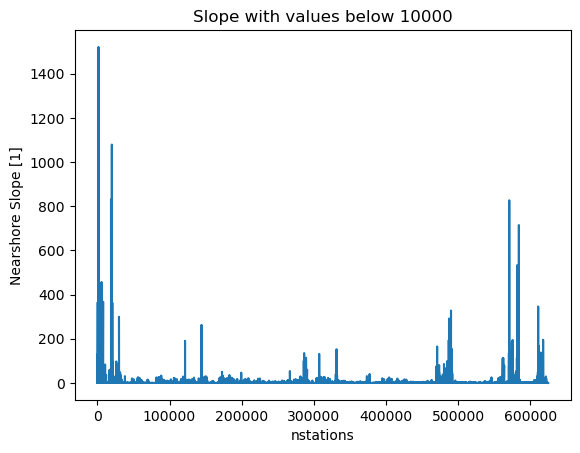

In [61]:
ds=ds.compute()

# Find the maximum value of ds["slope"]
max_slope =10000

# Drop the maximum value of ds["slope"]
ds_without_max = ds["slope"][ds["slope"] < max_slope]

# Create a map projection
ax = plt.axes()

# Plot the variable without the maximum value
ds_without_max.plot(ax=ax)

# Set the title
plt.title(f'Slope with values below {max_slope}')

# Show the plot
plt.show()


In [62]:
df=ds.to_dataframe()
df.head()

,dc,error_code,lat,lon,slope
nstations,,,,,
0,20.485961,6,-58.4052,-26.3728,0.011182
1,20.485961,6,-58.4079,-26.3890,0.011312
2,20.485961,6,-58.4098,-26.4057,0.010914
3,20.485961,6,-58.4112,-26.4227,0.010500
4,20.485961,0,-58.4123,-26.4396,3.269054


In [63]:

data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
data_points

,dc,error_code,lat,lon,slope,geometry
nstations,,,,,,
0,20.485961,6,-58.4052,-26.3728,0.011182,POINT (-26.37280 -58.40520)
1,20.485961,6,-58.4079,-26.3890,0.011312,POINT (-26.38900 -58.40790)
2,20.485961,6,-58.4098,-26.4057,0.010914,POINT (-26.40570 -58.40980)
3,20.485961,6,-58.4112,-26.4227,0.010500,POINT (-26.42270 -58.41120)
4,20.485961,0,-58.4123,-26.4396,3.269054,POINT (-26.43960 -58.41230)
...,...,...,...,...,...,...
783433,8.504953,4,67.6111,48.1141,NaN,POINT (48.11410 67.61110)
783434,8.504953,2,67.6145,48.1203,0.001116,POINT (48.12030 67.61450)
783435,8.508141,2,67.5380,47.8598,0.001609,POINT (47.85980 67.53800)


In [64]:
template_df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template_Netherland_Antilles.csv")
template_df.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136


In [65]:

circle_center = gpd.GeoDataFrame(
    template_df, geometry=gpd.points_from_xy(template_df.Intersect_lon, template_df.Intersect_lat), crs="EPSG:4326"
)
circle_center

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197)
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923)
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606)
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248)
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853)
...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682)
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745)
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766)
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760)


In [66]:
check_distance=0.01



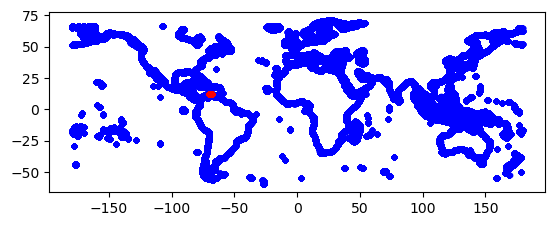

In [67]:


# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
buffer_circles = gpd.GeoDataFrame({'geometry': [Polygon(p.buffer(check_distance)) for p in circle_center['geometry']]})


# Step 2: Visualize these 2 geospatial datasets on a map
fig, ax = plt.subplots()
data_points.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')
plt.show()


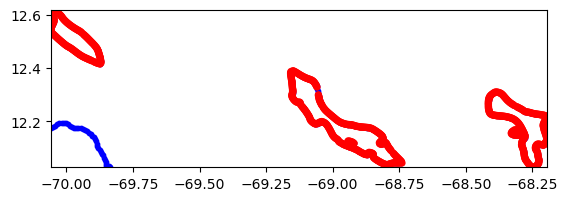

In [68]:
fig, ax = plt.subplots()
data_points.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')

# Set the axis limits to the extent of circle_center
xmin, ymin, xmax, ymax = circle_center.total_bounds

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()


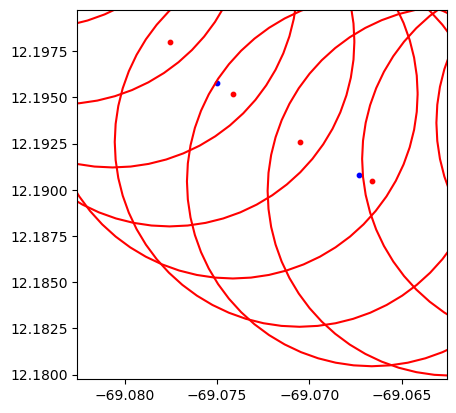

In [69]:
search_radius=check_distance
lon_x=-69.07256	
lat_y=12.18975


fig, ax = plt.subplots()
data_points.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')

# Set the axis limits to the extent of circle_center
# xmin, ymin, xmax, ymax = circle_center.total_bounds
xmin,xmax=lon_x-search_radius,lon_x+search_radius
ymin,ymax=lat_y-search_radius,lat_y+search_radius
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()


c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



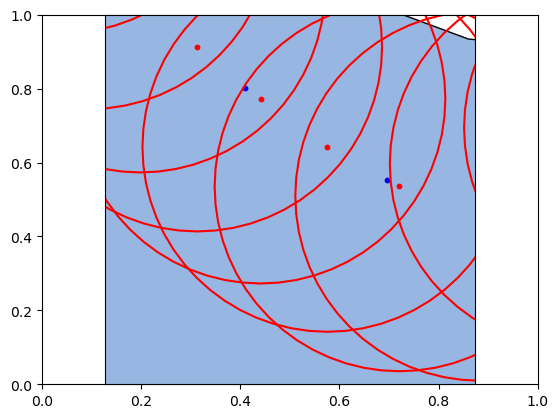

In [70]:
search_radius=check_distance
lon_x=-69.07256	
lat_y=12.18975

# Create a bounding box geometry from the extent of buffer circles
xmin, ymin, xmax, ymax = circle_center.total_bounds
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
bbox = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

# Spatially join data_points with the bounding box to select only the points within the extent of buffer circles
data_points_within_extent = gpd.sjoin(data_points, bbox, op='within')


fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.PlateCarree())

data_points_within_extent.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')


# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

# Set the axis limits to the extent of circle_center
# xmin, ymin, xmax, ymax = circle_center.total_bounds
xmin,xmax=lon_x-search_radius,lon_x+search_radius
ymin,ymax=lat_y-search_radius,lat_y+search_radius
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()


In [84]:
nearest_point["slope"].values

array([2.72342358])

In [77]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points_within_extent[data_points_within_extent.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,'slope']=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,'slope']=nearest_point["slope"].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 623/623 [00:30<00:00, 20.25it/s]


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,slope
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.40103 12.30197),2.0,2.571829
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.40454 12.29923),2.0,2.571829
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.40765 12.29606),3.0,1.955613
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.41024 12.29248),2.0,1.955613
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.41218 12.28853),3.0,2.997358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.30046 12.16682),2.0,2.392250
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.30491 12.16745),2.0,3.694947
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.30938 12.16766),2.0,3.694947
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.31387 12.16760),2.0,2.723424


In [ ]:
circle_center.describe()

,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,sampled points,slope
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,603.000000
mean,-68.949171,12.251419,-68.949236,12.251409,-68.949302,12.251398,2.192616,2.335220
std,0.610307,0.157667,0.610693,0.158956,0.611143,0.160484,0.437190,2.711854
min,-70.052990,12.035837,-70.058781,12.027054,-70.067711,12.018272,1.000000,0.002742
25%,-69.141392,12.129905,-69.146624,12.124626,-69.150329,12.124619,2.000000,0.755884
50%,-68.907842,12.214181,-68.910344,12.214310,-68.911654,12.209548,2.000000,1.840945
75%,-68.336914,12.348892,-68.335279,12.354506,-68.334995,12.358570,2.000000,2.815828
max,-68.204993,12.612777,-68.196121,12.618658,-68.187140,12.625781,4.000000,17.600137


In [46]:
circle_center.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Nearshore_Slopes\Netherland_Antilles_NS.csv",index=False)

In [112]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Nearshore_Slopes\Netherland_Antilles_NS.csv")
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,sampled points,slope
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,POINT (-68.4010327965 12.3019667269),2.0,2.571829
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,POINT (-68.4045404821 12.2992259882),2.0,2.571829
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,POINT (-68.4076539598 12.2960629139),3.0,1.955613
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,POINT (-68.4102441499 12.2924830911),2.0,1.955613
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,POINT (-68.4121789278 12.2885311896),3.0,2.997358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,POINT (-68.3004638825 12.1668173929),2.0,2.392250
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,POINT (-68.304908173 12.1674528229),2.0,3.694947
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,POINT (-68.3093809111 12.1676642697),2.0,3.694947
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,POINT (-68.3138720252 12.1676012754),2.0,2.723424


In [119]:
import plotly.graph_objects as go

# Define your discrete color scale
color_scale = ['#D9EAD3', '#A9D08E', '#F9D670', '#FFA94D', '#FF704D', '#FF4D4D']

# Create the scatter mapbox plot using Plotly Graph Objects
fig2 = go.Figure(go.Scattermapbox(
    lat=df['Intersect_lat'],
    lon=df['Intersect_lon'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['slope'],  # Use the 'Land_sub' column for color
        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            title='Nearshore Slope (m)'  # Set color bar title
        )
    ),
    hoverinfo='text',
    hovertext=df['slope'],
    showlegend=False
))

# Create the scatter mapbox plot using Plotly Graph Objects
fig2.add_trace(go.Scattermapbox(
    lat=data_points_within_extent['lat'],
    lon=data_points_within_extent['lon'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',  # Set color to red
    ),
    hoverinfo='text',
    hovertext=data_points_within_extent['slope'],
    name='Original Slope Dataset'
))

# Update layout properties
fig2.update_layout(
    title="Nearshore Slopes in the Dutch Antilles",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=8,
        center=dict(lat=12.18625, lon=-69.00168)
    ),		

    margin=dict(l=0, r=50, b=0, t=50),
    legend=dict(
    x=1.15,
    y=1.0,
    traceorder="normal",
    orientation="v"
)
)

# Show the plot
fig2.show()

